# Предсказание  следующего хода

K/k — король  

Q/q — ферзь  

R/r — ладья  

B/b — слон  

N/n — конь  

P/p — пешка  

#### Расшифровка записи

7k/5p1p/p2p1Pr1/1p4pQ/8/P1P5/2pr3P/2R2K2 w - - 0 1  

w : ход белых  

— : рокировка невозможна  

— : нет возможности взятия на проходе  

0 : 0 полуходов прошло с последнего хода пешки или взятия  

1 : первый полный ход партии (начало)  

In [1]:
path_dataset_1 = 'data/fens_training_set.csv'

path_dataset_2 = 'data/fens_processed_no_turn.csv'

## 2. Датасет

In [ ]:
from utils.dataset import ChessDataset
import torch


dataset = ChessDataset(path_dataset_2)
for board, castling, label in dataset:
    print(board.shape)  
    print(castling.shape)    
    print(label)        
    break


dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

for board, castling, label in dataloader:
    print(board.shape)  
    print(castling.shape)     
    print(label.shape) 
    break



torch.Size([13, 8, 8])
torch.Size([4])
tensor(2517)
torch.Size([1, 13, 8, 8])
torch.Size([1, 4])
torch.Size([1])


## 3. Модель

In [ ]:
from utils.models import CNNTransformerChessNet

model = CNNTransformerChessNet(num_channels=13, castling_features=4, num_classes=4096)

logits = model(board, castling)          

print(logits.shape)  # [batch_size, 4096]


torch.Size([1, 4096])


/home/maksim/develops/python/env1/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [12]:
logits

tensor([[-0.2691,  0.4833,  0.5851,  ...,  0.5098,  0.0088, -0.1119]],
       grad_fn=<AddmmBackward0>)

## Тренировка

In [ ]:
from utils.dataset import create_data_loaders_from_csv

dataset = ChessDataset(path_dataset_2)

train_loader, val_loader = create_data_loaders_from_csv(dataset, batch_size=2048, val_split=0.3)


In [17]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.load_state_dict(torch.load("save_model/cnn_tr_model.pth", map_location=torch.device(device)))  

<All keys matched successfully>

Epoch 1/50


Train loss: 2.3119, acc: 0.3919
Val   loss: 1.5946, acc: 0.5541
Saved best model with val acc: 0.5541
------------------------------
Epoch 2/50


Train loss: 2.0421, acc: 0.4439
Val   loss: 1.4931, acc: 0.5890
Saved best model with val acc: 0.5890
------------------------------
Epoch 3/50


Train loss: 1.8690, acc: 0.4785
Val   loss: 1.4026, acc: 0.6159
Saved best model with val acc: 0.6159
------------------------------
Epoch 4/50


Train loss: 1.6932, acc: 0.5170
Val   loss: 1.3081, acc: 0.6478
Saved best model with val acc: 0.6478
------------------------------
Epoch 5/50


Train loss: 1.5160, acc: 0.5595
Val   loss: 1.2558, acc: 0.6724
Saved best model with val acc: 0.6724
------------------------------
Epoch 6/50


Train loss: 1.3447, acc: 0.6035
Val   loss: 1.1773, acc: 0.6990
Saved best model with val acc: 0.6990
------------------------------
Epoch 7/50


Train loss: 1.1933, acc: 0.6430
Val   loss: 1.1480, acc: 0.7159
Saved best model with val acc: 0.7159
------------------------------
Epoch 8/50


Train loss: 1.0619, acc: 0.6789
Val   loss: 1.1262, acc: 0.7321
Saved best model with val acc: 0.7321
------------------------------
Epoch 9/50


Train loss: 0.9547, acc: 0.7087
Val   loss: 1.1238, acc: 0.7403
Saved best model with val acc: 0.7403
------------------------------
Epoch 10/50


Train loss: 0.8693, acc: 0.7342
Val   loss: 1.1191, acc: 0.7480
Saved best model with val acc: 0.7480
------------------------------
Epoch 11/50


Train loss: 0.7930, acc: 0.7553
Val   loss: 1.1471, acc: 0.7516
Saved best model with val acc: 0.7516
------------------------------
Epoch 12/50


Train loss: 0.7258, acc: 0.7766
Val   loss: 1.1602, acc: 0.7549
Saved best model with val acc: 0.7549
------------------------------
Epoch 13/50


Train loss: 0.6771, acc: 0.7905
Val   loss: 1.1663, acc: 0.7594
Saved best model with val acc: 0.7594
------------------------------
Epoch 14/50


Train loss: 0.6331, acc: 0.8045
Val   loss: 1.1636, acc: 0.7607
Saved best model with val acc: 0.7607
------------------------------
Epoch 15/50


Train loss: 0.5972, acc: 0.8150
Val   loss: 1.1867, acc: 0.7616
Saved best model with val acc: 0.7616
------------------------------
Epoch 16/50


Train loss: 0.5702, acc: 0.8237
Val   loss: 1.2011, acc: 0.7629
Saved best model with val acc: 0.7629
------------------------------
Epoch 17/50


Train loss: 0.5469, acc: 0.8298
Val   loss: 1.2051, acc: 0.7632
Saved best model with val acc: 0.7632
------------------------------
Epoch 18/50


Train loss: 0.5223, acc: 0.8380
Val   loss: 1.2052, acc: 0.7633
Saved best model with val acc: 0.7633
------------------------------
Epoch 19/50


Train loss: 0.5076, acc: 0.8428
Val   loss: 1.2299, acc: 0.7639
Saved best model with val acc: 0.7639
------------------------------
Epoch 20/50


Train loss: 0.4854, acc: 0.8494
Val   loss: 1.2474, acc: 0.7630
------------------------------
Epoch 21/50


Train loss: 0.4751, acc: 0.8521
Val   loss: 1.2515, acc: 0.7628
------------------------------
Epoch 22/50


Train loss: 0.4596, acc: 0.8578
Val   loss: 1.2885, acc: 0.7649
Saved best model with val acc: 0.7649
------------------------------
Epoch 23/50


Train loss: 0.4450, acc: 0.8616
Val   loss: 1.2834, acc: 0.7636
------------------------------
Epoch 24/50


Train loss: 0.4362, acc: 0.8643
Val   loss: 1.2974, acc: 0.7622
------------------------------
Epoch 25/50


Train loss: 0.4269, acc: 0.8681
Val   loss: 1.2966, acc: 0.7633
------------------------------
Epoch 26/50


Train loss: 0.4223, acc: 0.8689
Val   loss: 1.3225, acc: 0.7634
------------------------------
Epoch 27/50


Train loss: 0.4167, acc: 0.8707
Val   loss: 1.3166, acc: 0.7621
------------------------------
Epoch 28/50


Train loss: 0.4122, acc: 0.8723
Val   loss: 1.3264, acc: 0.7635
------------------------------
Epoch 29/50


Train loss: 0.4023, acc: 0.8759
Val   loss: 1.3340, acc: 0.7643
------------------------------
Epoch 30/50


Train loss: 0.3993, acc: 0.8769
Val   loss: 1.3296, acc: 0.7634
------------------------------
Epoch 31/50


Train loss: 0.3934, acc: 0.8782
Val   loss: 1.3588, acc: 0.7629
------------------------------
Epoch 32/50


Train loss: 0.3869, acc: 0.8813
Val   loss: 1.4031, acc: 0.7616
------------------------------
Epoch 33/50


Train loss: 0.3794, acc: 0.8824
Val   loss: 1.3901, acc: 0.7642
------------------------------
Epoch 34/50


Train loss: 0.3772, acc: 0.8836
Val   loss: 1.3715, acc: 0.7627
------------------------------
Epoch 35/50


Train loss: 0.3713, acc: 0.8852
Val   loss: 1.4115, acc: 0.7618
------------------------------
Epoch 36/50


Train loss: 0.3694, acc: 0.8853
Val   loss: 1.3817, acc: 0.7626
------------------------------
Epoch 37/50


Train loss: 0.3664, acc: 0.8857
Val   loss: 1.4174, acc: 0.7609
------------------------------
Epoch 38/50


Train loss: 0.3667, acc: 0.8868
Val   loss: 1.3906, acc: 0.7597
------------------------------
Epoch 39/50


Train loss: 0.3650, acc: 0.8865
Val   loss: 1.4401, acc: 0.7619
------------------------------
Epoch 40/50


Train loss: 0.3606, acc: 0.8891
Val   loss: 1.3935, acc: 0.7612
------------------------------
Epoch 41/50


Train loss: 0.3570, acc: 0.8894
Val   loss: 1.4039, acc: 0.7618
------------------------------
Epoch 42/50


Train loss: 0.3523, acc: 0.8905
Val   loss: 1.4018, acc: 0.7626
------------------------------
Epoch 43/50


Train loss: 0.3473, acc: 0.8926
Val   loss: 1.4168, acc: 0.7624
------------------------------
Epoch 44/50


Train loss: 0.3459, acc: 0.8928
Val   loss: 1.3990, acc: 0.7633
------------------------------
Epoch 45/50


Train loss: 0.3454, acc: 0.8928
Val   loss: 1.4401, acc: 0.7629
------------------------------
Epoch 46/50


Train loss: 0.3418, acc: 0.8942
Val   loss: 1.4068, acc: 0.7610
------------------------------
Epoch 47/50


Train loss: 0.3419, acc: 0.8947
Val   loss: 1.4152, acc: 0.7606
------------------------------
Epoch 48/50


Train loss: 0.3373, acc: 0.8953
Val   loss: 1.3956, acc: 0.7619
------------------------------
Epoch 49/50


Train loss: 0.3369, acc: 0.8964
Val   loss: 1.4598, acc: 0.7612
------------------------------
Epoch 50/50


Train loss: 0.3338, acc: 0.8970
Val   loss: 1.4176, acc: 0.7613
------------------------------


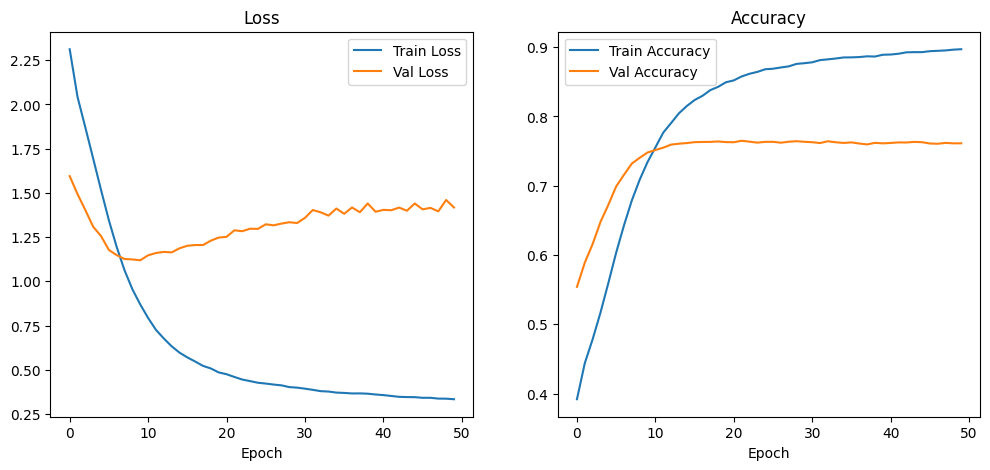

In [19]:
from utils.train import train_model
train_model(model, train_loader, val_loader, device=device, epochs=10, lr=1e-3, save_path="save_model/cnn_tr_model.pth", model_name="CNNTransformer")